# Лекция №2

# Гистограммы 

Так что такое гистограмма? Вы можете рассматривать гистограмму как график или график, который дает вам общее представление о распределении интенсивности изображения. Это график со значениями пикселей (от $0$ до $255$, не всегда) по оси X и соответствующим количеством пикселей в изображении по оси Y.

Это просто еще один способ понять образ. Глядя на гистограмму изображения, вы получаете представление о контрасте, яркости, распределении интенсивности и т.д. этого изображения. Почти все инструменты обработки изображений сегодня предоставляют функции на гистограмме.

<img src="img/histogram_sample.jpg" alt="Drawing" style="width: 400px;"/>

Вы можете увидеть изображение и его гистограмму. (Помните, эта гистограмма нарисована для изображения в оттенках серого, а не для цветного изображения). Левая область гистограммы показывает количество более темных пикселей на изображении, а правая область показывает количество более ярких пикселей. На гистограмме видно, что темная область больше, чем яркая, а количество полутонов (значения пикселей в среднем диапазоне, скажем, около $127$) очень меньше.

## Найдем гистограмму

**Гистограммы** $-$ это собранные данные, организованные в набор предопределенных столбцов.
Когда мы говорим данные, мы не ограничиваем их значениями интенсивности (как мы видели в предыдущем уроке). Собранные данные могут быть любой функцией, которую вы найдете полезной для описания вашего изображения.

Давайте посмотрим на пример. Представьте, что матрица содержит информацию об изображении (то есть интенсивность в диапазоне $0-255$):

<img src="img/Histogram_Calculation_Theory_Hist.jpg" alt="Drawing" style="width: 400px;"/>

Что произойдет, если мы захотим считать эти данные организованным способом? Так как мы знаем, что диапазон информационных значений для этого случая равен 256 значениям, мы можем сегментировать наш диапазон по частям (называемым ячейками), например:

$$
{\begin{array}{l}
[0, 255] = { [0, 15] \cup [16, 31] \cup ....\cup [240,255] } \\
range = { bin_{1} \cup bin_{2} \cup ....\cup bin_{n = 15} }
\end{array}}
$$

и мы можем вести подсчет количества пикселей, попадающих в диапазон каждого $bin_{i}$. Применяя это к примеру выше, мы получаем изображение ниже (ось x представляет ячейки, а ось y – количество пикселей в каждом из них).

<img src="img/Histogram_Calculation_Theory_Hist1.jpg" alt="Drawing" style="width: 400px;"/>

Это был простой пример того, как работает гистограмма и почему она полезна. Гистограмма может вести учет не только интенсивности цвета, но и любых характеристик изображения, которые мы хотим измерить (то есть градиенты, направления и т.д.).

Давайте выделим некоторые части гистограммы:

* __dims__: количество параметров, для которых вы хотите собрать данные. В нашем примере dims = $1$, потому что мы рассчитываем только значения интенсивности каждого пикселя (в полутоновом изображении)
* __bins__: это количество подразделений в каждом тусклом свете. В нашем примере bins = $16$
* __range__: пределы измеряемых значений. В этом случае: range = $[0,255]$

Что если вы хотите сосчитать две особенности? В этом случае ваша результирующая гистограмма будет трехмерным графиком (в котором $x$ и $y$ будут $bin_{x}$ и $bin_{y}$ для каждого объекта, а $z$ будет количеством отсчетов для каждой комбинации $(bin_ {x}, bin_ {y})$. То же самое относится и к дополнительным функциям (конечно, это становится сложнее).

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline

### Гистограммы в OpenCV

Воспользуемся функцией **cv2.calcHist()**, чтобы найти гистограмму. Давайте ознакомимся с функцией и ее параметрами:

**cv2.calcHist (image, channel, mask, histSize, range[ , hist[, accumulate]])**

* **images** $-$ это исходное изображение типа $uint8$ или $float32$. его следует указывать в квадратных скобках, т.е. "[img]".
* **channel** $-$ также указывается в квадратных скобках. Это индекс канала, для которого мы рассчитываем гистограмму. Например, если входное изображение представляет собой изображение в градациях серого, его значение равно $[0]$. Для цветного изображения вы можете передать $[0]$, $[1]$ или $[2]$, чтобы вычислить гистограмму синего, зеленого или красного канала соответственно.
* **mask** $-$ маска изображения. Чтобы найти гистограмму полного изображения, она задается как **None**. Но если вы хотите найти гистограмму определенной области изображения, вы должны создать для нее изображение маски и указать ее как маску. (Я покажу пример позже.)
* **histSize** $-$ это представляет наш счетчик __bin__. Нужно указывать в квадратных скобках. Для полной шкалы мы передаем $[256]$.
* **range** $-$ это наш **range**. Обычно это $[0,256]$.
* **hist** $-$ выходная гистограмма, представляющая собой плотный или разреженный размерный массив.
* **accumulate** $-$ накопительный флаг. Если он установлен, гистограмма не очищается в начале при выделении. Эта функция позволяет вычислять одну гистограмму из нескольких наборов массивов или своевременно обновлять гистограмму.

Итак, начнем с примера изображения. Просто загрузите изображение в режиме оттенков серого и найдите его полную гистограмму.

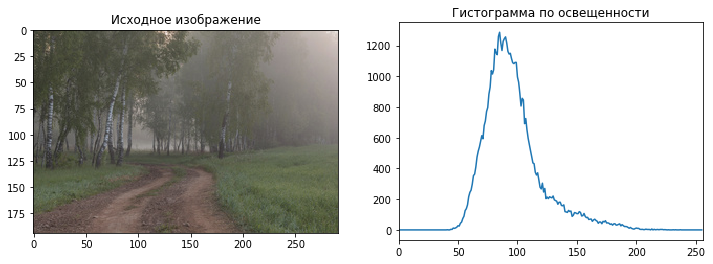

In [2]:
img = cv2.imread('img/forest_1.jpg')
## помним про matplotlib
img_plt = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2BGR)
## grayscale
gray = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)

## получим гистограмму
## ravel() - разворачивает массив в список
hist = cv2.calcHist([gray.ravel()], [0], None, [256], [0,256])

fig, m_axs = plt.subplots(1, 2, figsize=(12,4))
ax1, ax2 = m_axs

ax1.set_title('Исходное изображение')
ax1.imshow(img_plt)
ax2.set_title('Гистограмма по освещенности')
ax2.plot(hist)
ax2.set_xlim([0,256]);

### Гистограммы в  Numpy

Numpy также предоставляет вам функцию __np.histogram()__. Так что вместо функции __cv2.calcHist()__ вы можете использовать строку ниже:

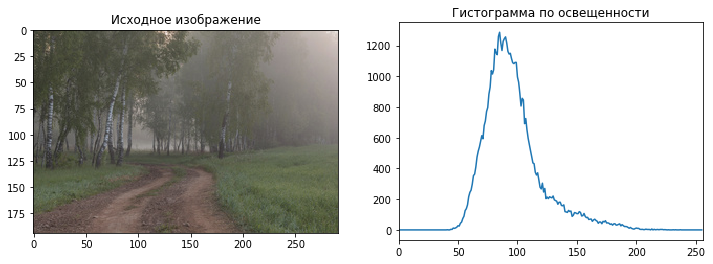

In [3]:
hist, bins = np.histogram(gray.ravel(), 256, [0,256])

fig, m_axs = plt.subplots(1, 2, figsize=(12,4))
ax1, ax2 = m_axs

ax1.set_title('Исходное изображение')
ax1.imshow(img_plt)
ax2.set_title('Гистограмма по освещенности')
ax2.plot(hist)
ax2.set_xlim([0,256]);

Гистограмма аналогичная, как мы рассчитывали ранее. Но ячейки будут иметь $257$ элементов, потому что **Numpy** рассчитывает ячейки как $0-0.99$, $1-1.99$, $2-2.99$ и т.д. Таким образом, конечный диапазон будет $255-255.99$. Чтобы представить это, они также добавляют $256$ в конце бинов. Но нам не нужно это $256$. До $255$ достаточно.

Визуализируем сразу $3$ канала цвета:

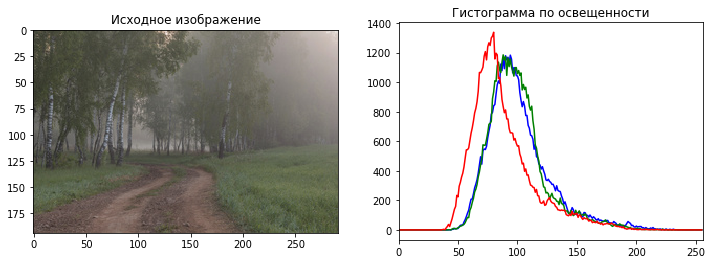

In [14]:
fig, m_axs = plt.subplots(1, 2, figsize=(12,4))
ax1, ax2 = m_axs

ax1.set_title('Исходное изображение')
ax1.imshow(img_plt)
ax2.set_title('Гистограмма по освещенности')
ax2.set_xlim([0,256])

color = ('b', 'g', 'r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_plt], [i], None, [256], [0,256])
    ax2.plot(histr, color=col)

### Применение маски

Мы использовали __cv2.calcHist()__, чтобы найти гистограмму полного изображения. Что если вы хотите найти гистограммы некоторых областей изображения? Просто создайте изображение маски белым цветом на области, где вы хотите найти гистограмму, и черным в противном случае. Затем передайте это как маску.

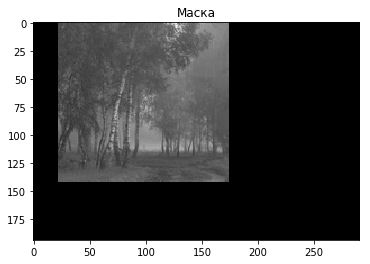

In [15]:
## grayscale
gray = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)

## создадим маску c помощью GUI ROI
## маска должна быть одномерной
mask = np.zeros(img.shape[:2], np.uint8)
roi = cv2.selectROI(img)
## на выделенное место подставим маску
mask[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])] = \
gray[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]

cv2.waitKey(0)
cv2.destroyAllWindows()

masked_img = cv2.bitwise_and(gray, gray, mask=mask)

## проверим, что мы вырезали то, что хотели
plt.title('Маска')
plt.imshow(masked_img, cmap='gray');

Тут мы воспользовались распространенным приемом с *"подложкой"*, т.е. использовали массив из нулей, на которой наложили интересующую картнику. 

Для арифметических операция над матрицами в OpenCV есть несклько базовых функций. Рассмотрим несколько из них:

* __cv2.absdiff(src1, src2[,dst])__

    абсолютная разница между двумя массивами: $${\texttt{dst}(I)=|\texttt{src1}(I)-\texttt{src2}(I)|}$$

* __cv2.add(src1, src2[, dst[, mask[, dtype]]])__

    Функция add рассчитывае сумму двух массивов: $${\texttt{dst}(I)=\texttt{src1}(I)+\texttt{src2}(I) \quad\texttt{if mask}(I)\ne0}$$

* __cv2.bitwise_and(src1, src2[, dst[, mask]])__

    Функция рассчитывает побитовое логическое соединение для каждого элемента массива: $${\texttt{dst} (I)=\texttt{src1}(I)\wedge\texttt{src2}(I)\quad\texttt{if mask}(I)\ne0}$$

* __cv2.bitwise_not(src[, dst[, mask]])__

    Функция рассчитывает побитовую инверсию входного массива для каждого элемента: $${\texttt{dst}(I)=\neg{\texttt{src}(I)}}$$

* __cv2.bitwise_or(src1, src2[, dst[, mask]])__

    Функция вычисляет побитовую логическую дизъюнкцию для каждого элемента для: $${\texttt{dst}(I)=\texttt{src1}(I)\vee\texttt{src2}(I)\quad\texttt{if mask}(I)\ne0}$$

* __cv2.bitwise_xor(src1, src2[, dst[, mask]])__

    Функция вычисляет побитовую логическую операцию «исключая или» для каждого элемента массива: $${\texttt{dst}(I)=\texttt{src1}(I)\oplus\texttt{src2}(I)\quad\texttt{if mask}(I)\ne0}$$

Остальные можно найти в [документации](https://docs.opencv.org/3.4.2/d2/de8/group__core__array.html)

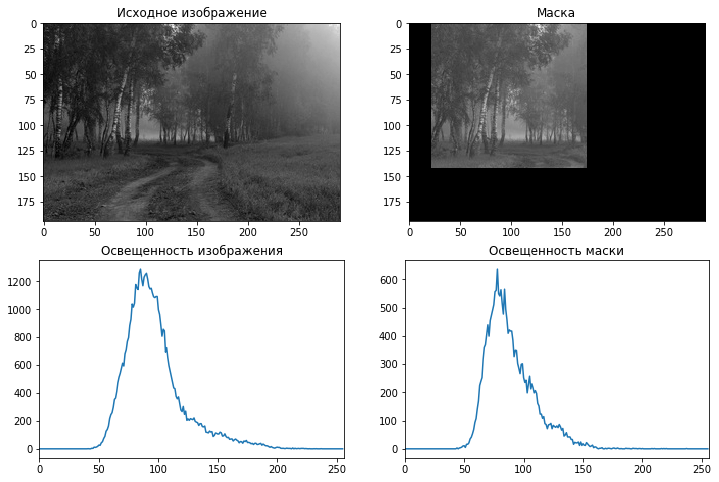

In [16]:
## посчитаем гистограмму для всего изображения и маски
hist_full = cv2.calcHist([gray],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([gray],[0],mask,[256],[0,256])


fig, m_axs = plt.subplots(2, 2, figsize=(12,8))
ax1, ax2 = m_axs

ax1[0].set_title('Исходное изображение')
ax1[0].imshow(gray, cmap='gray')
ax1[1].set_title('Маска')
ax1[1].imshow(masked_img, cmap='gray')
ax2[0].set_title('Освещенность изображения')
ax2[0].plot(hist_full)
ax2[0].set_xlim(0, 256)
ax2[1].set_title('Освещенность маски')
ax2[1].plot(hist_mask)
ax2[1].set_xlim(0, 256);

Теперь посмотрим для всех каналов цвета интесивность на маске

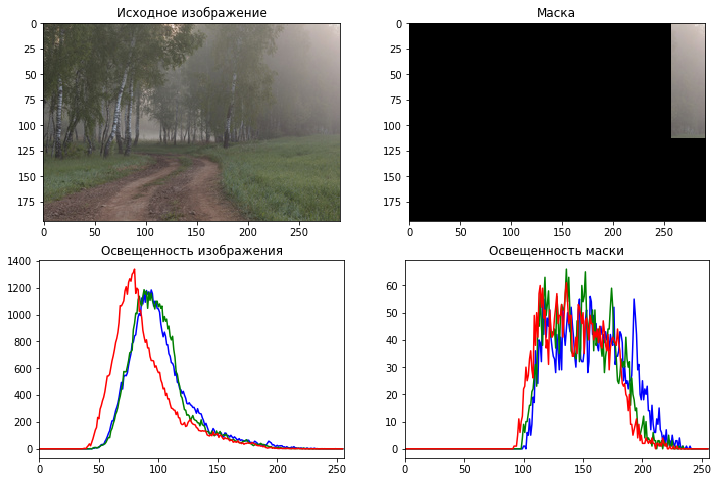

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

## создадим маску c помощью GUI ROI
mask = np.zeros(img.shape[:2], np.uint8)
roi = cv2.selectROI(img)
mask[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])] =\
gray[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]

cv2.waitKey(0)
cv2.destroyAllWindows()

masked_img = cv2.bitwise_and(img_plt, img_plt, mask=mask)

fig, m_axs = plt.subplots(2, 2, figsize=(12,8))
ax1, ax2 = m_axs

ax1[0].set_title('Исходное изображение')
ax1[0].imshow(img_plt, cmap='gray')
ax1[1].set_title('Маска')
ax1[1].imshow(masked_img, cmap='gray')
ax2[0].set_title('Освещенность изображения')
ax2[1].set_title('Освещенность маски')

color = ('b', 'g', 'r')
for i,col in enumerate(color):
    hist_full = cv2.calcHist([img_plt], [i], None, [256], [0,256])
    hist_mask = cv2.calcHist([img_plt], [i], mask, [256], [0,256])
    ax2[0].plot(hist_full, color=col)
    ax2[0].set_xlim(0, 256)
    ax2[1].plot(hist_mask, color=col)
    ax2[1].set_xlim(0, 256)
    

## Выравнивание гистограм

Рассмотрим изображение, значения пикселей которого ограничены только определенным диапазоном значений. Например, более яркое изображение будет иметь все пиксели, ограниченные высокими значениями. Но хорошее изображение будет иметь пиксели из всех областей изображения. Таким образом, вам нужно растянуть эту гистограмму до конца (как показано на изображении ниже), и это то, что делает выравнивание гистограммы (если коротко). Это обычно улучшает контраст изображения.

<img src="img/histogram_equalization.png" alt="Drawing" style="width: 400px;"/>

Я бы порекомендовал вам прочитать страницу Википедии по выравниванию гистограммы для более подробной информации. Он имеет очень хорошее объяснение с отработанными примерами, так что вы сможете понять почти все после прочтения этого. Вместо этого здесь мы увидим его реализацию Numpy. После этого мы увидим функцию OpenCV.

Нам понадобится функция распределения значений пикслей в градации серого: 

$${cdf(x)=h(0)+h(1)+\dots+h(x),}$$ где $h(x)$ $-$ функция гистограммы

Значение функции распределения показывает, какое количество пикселей имеют яркости из отрезка $[0,x]$.

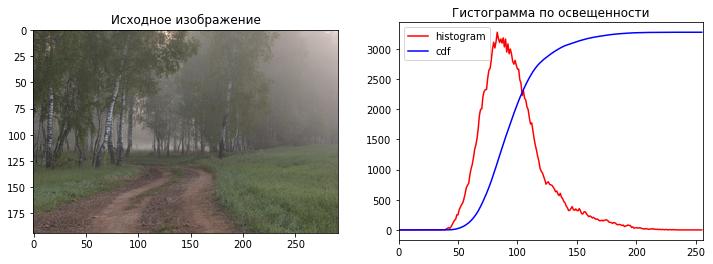

In [18]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
## помним про matplotlib
img_plt = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2BGR)

hist,bins = np.histogram(img_plt.flatten(),256,[0,256])

## фунция распределения
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

fig, m_axs = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = m_axs

ax1.set_title('Исходное изображение')
ax1.imshow(img_plt)
ax2.set_title('Гистограмма по освещенности')
ax2.plot(hist, color='r')
ax2.plot(cdf_normalized, color='b')
ax2.legend(('histogram', 'cdf'), loc = 'upper left')
ax2.set_xlim(0, 256);

Вы можете видеть гистограмму, лежащую в более ярком регионе. Нам нужен полный спектр. Для этого нам нужна функция преобразования, которая отображает входные пиксели в более яркой области для вывода пикселей в полной области. Это то, что делает выравнивание гистограммы.

Теперь мы находим минимальное значение гистограммы (исключая $0$) и применяем уравнение выравнивания гистограммы. Но я использовал здесь концептуальный массив маскированных массивов от **Numpy**. Для маскированного массива все операции выполняются на немаскированных элементах. Вы можете прочитать больше об этом в документации Numpy на масках.

In [19]:
cdf_m = np.ma.masked_equal(cdf.copy(), 0)
## выравнивание к линейному распределению
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint32')

Теперь у нас есть справочная таблица, которая дает нам информацию о том, что является значением выходного пикселя для каждого значения входного пикселя. Поэтому мы просто применяем преобразование.

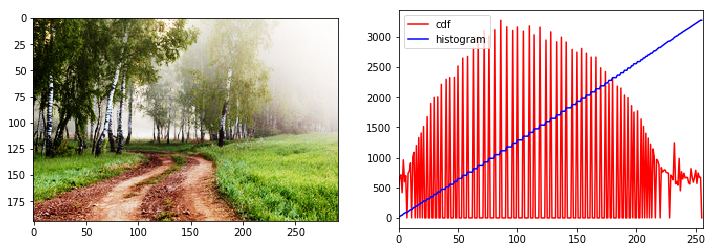

In [20]:
img2 = cdf[img_plt]

hist2,bins2 = np.histogram(img2.flatten(),256,[0,256])
cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * hist2.max()/ cdf2.max()


fig, m_axs = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = m_axs

ax1.imshow(img2, cmap='gray')
ax2.plot(hist2, color='r')
ax2.plot(cdf_normalized2, color='b')
ax2.legend(('cdf','histogram'), loc = 'upper left')
ax2.set_xlim(0, 256)
plt.show();

OpenCV имеет функцию для этого, **cv2.equalizeHist()**. Его вход $-$ это просто изображение в градациях серого, а вывод – изображение, выровненное по гистограмме. Однако, реализация в OpenCV рабоает зачастую медленне, чем Numpy.

## Адаптивный эквалайзер с ограниченной адаптивной гистограммой (CLAHE)

Первое выравнивание гистограммы, которое мы только что видели, учитывает глобальный контраст изображения. Во многих случаях это не очень хорошая идея. Например, ниже изображение показывает входное изображение и его результат после глобальной выравнивания гистограммы.

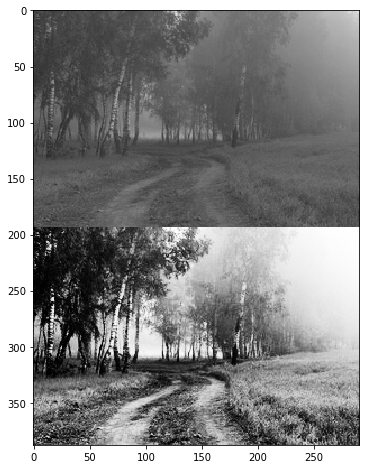

In [21]:
## вспомним, что было с линиаризацией освещенности
img = cv2.imread('img/forest_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
equ = cv2.equalizeHist(gray)

res = np.vstack((gray, equ))
plt.figure(figsize=(12,8))
plt.imshow(res, cmap='gray');

Это правда, что контрастность фона улучшилась после выравнивания гистограммы. Мы потеряли большую часть информации там из-за чрезмерной яркости. Это потому, что его гистограмма не ограничена определенной областью, как мы видели в предыдущих случаях.

Поэтому для решения этой проблемы используется __адаптивное выравнивание гистограммы (AHE)__. При этом изображение делится на маленькие блоки, называемые «плитками» (tileSize по умолчанию в OpenCV составляет $8\times8$). Затем каждый из этих блоков гистограммы выравнивается как обычно. Таким образом, в небольшой области гистограмма будет ограничена небольшой областью (если нет шума), как показано на рисунке:

<img src="img/AHE-neighbourhoods.png" alt="Drawing" style="width: 300px;"/>

Если шум есть, он будет усилен. Чтобы избежать этого, применяется ограничение контраста. Если какой-либо интервал гистограммы превышает указанный предел контраста (по умолчанию $40$ в OpenCV), эти пиксели обрезаются и распределяются равномерно по другим интервалам перед применением выравнивания гистограммы. После выравнивания для удаления артефактов на границах мозаики применяется билинейная интерполяция.

Ниже приведен фрагмент кода, демонстрирующий применение CLAHE в OpenCV:

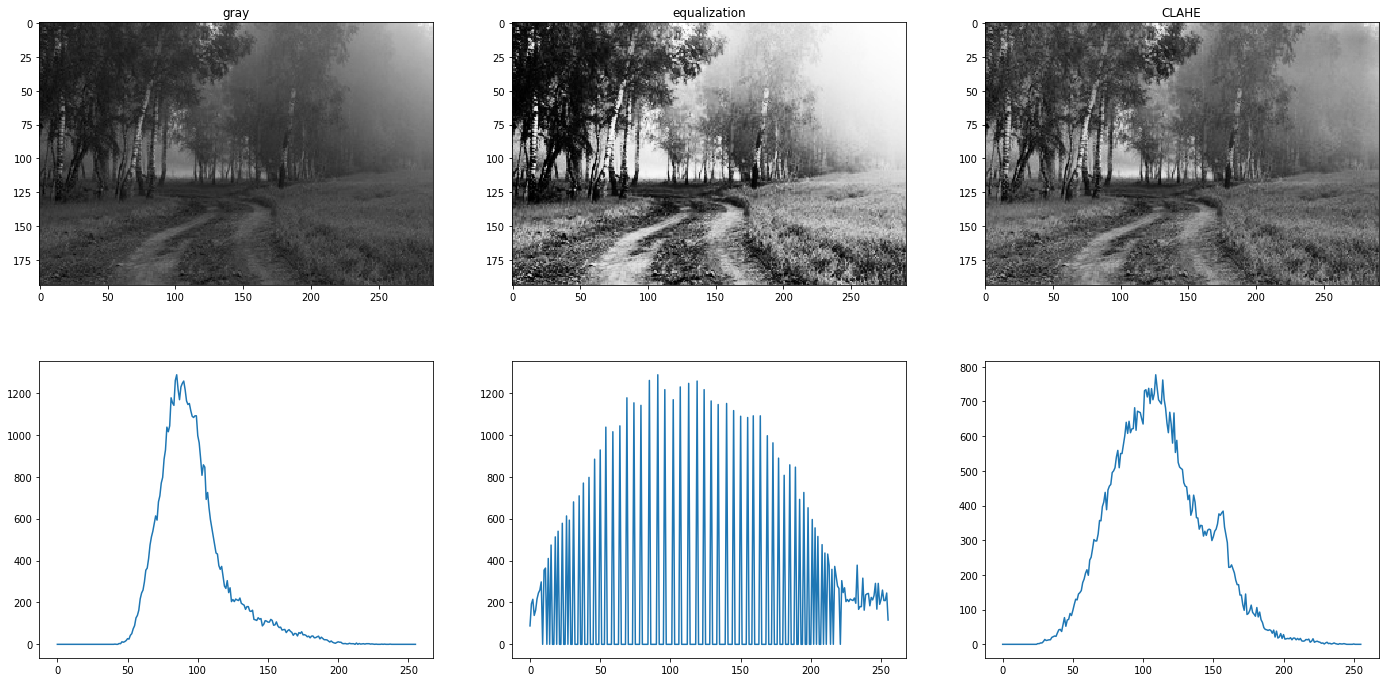

In [22]:
## бахнем CLAHE и сравним все
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(gray)
res = np.hstack((gray, equ, cl1))

hist_gray = cv2.calcHist([gray],[0],None,[256],[0,256])
hist_equ = cv2.calcHist([equ],[0],None,[256],[0,256])
hist_clahe = cv2.calcHist([cl1],[0],None,[256],[0,256])

fig, m_axs = plt.subplots(2, 3, figsize=(24, 12))
ax1, ax2 = m_axs

ax1[0].set_title('gray')
ax1[0].imshow(gray, cmap='gray')
ax1[1].set_title('equalization')
ax1[1].imshow(equ, cmap='gray')
ax1[2].set_title('CLAHE')
ax1[2].imshow(cl1, cmap='gray')

ax2[0].plot(hist_gray)
ax2[1].plot(hist_equ)
ax2[2].plot(hist_clahe);

## Сравнение гистограмм 

Безусловно, что пользы от гистограмм не будет никакой, если не сравнивать их с эталонными диаграммами. Предположим, есть эталонное изображение $-$ какой-то объект заданных размеров. Также есть множество неизвестных изображений, на которых нужно найти эталонное изображение. Для этого нужно перебирать участки изображений, сравнивая содержимое с эталоном. Можно сравнивать каждую точку из участка, но это будет медленно. Гораздо быстрее по ресурсам $-$ это сравнить гистограммы яркости. Для сравнения гистограмм в OpenCV предусмотрена функция **cv2.CompareHist()**.

Мы рассмотрим только одну метрику сравнения $-$ *cv2.HISTCMP_CORREL* 

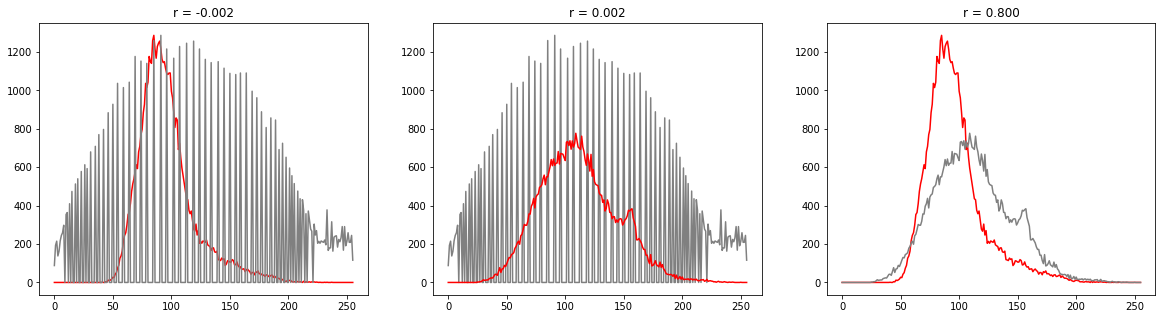

In [23]:
# возьмем выравненные гистограммы освещенности и сравним через корреляцию

## коэффицент корреляции между gray и equalization
cor_ge = cv2.compareHist(hist_gray, hist_equ, cv2.HISTCMP_CORREL)
## коэффицент корреляции между clahe и equalization
cor_ec = cv2.compareHist(hist_equ, hist_clahe, cv2.HISTCMP_CORREL)
## коэффицент корреляции между gray и clahe
cor_gc = cv2.compareHist(hist_gray, hist_clahe, cv2.HISTCMP_CORREL)

fig, m_axs = plt.subplots(1, 3, figsize=(20, 5))
ax1, ax2, ax3 = m_axs

ax1.set_title('r = {:.3f}'.format(cor_ge))
ax1.plot(hist_gray, color='r')
ax1.plot(hist_equ, color='gray')

ax2.set_title('r = {:.3f}'.format(cor_ec))
ax2.plot(hist_equ, color='gray')
ax2.plot(hist_clahe, color='r')

ax3.set_title('r = {:.3f}'.format(cor_gc))
ax3.plot(hist_gray, color='r')
ax3.plot(hist_clahe, color='gray');


Вообще говоря, сравнивать мы можем любые гистограммы. 

Разберём на примере самый простой случай классификации, когда пространство признака одномерное, а нам нужно разделить 2 класса. Ситуация встречается чаще, чем может представиться: например, когда нужно отличить два сигнала, или сравнить паттерн с образцом. Пусть у нас есть обучающая выборка. При этом получается изображение, где по оси X будет мера похожести, а по оси Y -количество событий с такой мерой. Когда искомый объект похож на себя — получается левая гауссиана. Когда не похож — правая. Значение X=0.4 разделяет выборки так, что ошибочное решение минимизирует вероятность принятия любого неправильного решения. Именно поиском такого разделителя и является задача классификации.

<img src="img/hist_comp.png" alt="Drawing" style="width: 700px;"/>

### Контрольные вопросы:

1. Как найти оптимальные параметры для clahe (поварируйте параметры)?

2. Как коррелируют гистограммы clahe и первичная?

3. Что будет с нормальной фоткой после clahe?

4. Как сделать clahe к цветному изображению?

5. Что будет, если __CLAHE__ применить к другим формата кодирования цвета: HSV, LAB? Какой формат кодирования лучше подходит для работы с коррекцией цвета?

6. Что будет, если __equalization__ применить к другим формата кодирования цвета: HSV, LAB? Какой формат кодирования лучше подходит для работы с коррекцией цвета?

### Домашняя работа #2

Часто при анализе изображений местности необходимо понять ее характер. В частности, если определить, что на изображении преобладет вода, то имеет смысл искать корабли на таком изображении. Если на картинке густой лес, то, возможно, это не лучшая зона для посадки дрона или беспилотника.

Ваша задача - написать программу, которая будет отличать лес от пустыни. В приложении можно найти реальные спутниковые снимки лесов и пустынь. Подобные примеры изображений присутствуют в тесте

Примеры изображений:
<table><tr>
    <td> <img src="../src/desert_forest/task_img/test_image_00.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="../src/desert_forest/task_img/test_image_06.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>